In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

# intégration des graphiques dans le notebook
%matplotlib inline

In [4]:
data_source_names = "../data/names"

names1880 = pd.read_csv( 
    f"{data_source_names}/yob1880.txt", 
    names=['name', 'sex', 'number']
)

In [5]:
names1880.head()

,name,sex,number
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [6]:
names1880.tail()

,name,sex,number
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5
1999,Zachariah,M,5


In [7]:
"""
Ici il n'y a qu'une seule colonne numérique, l'agrégation sum se fera uniquement sur number
"""
names1880.groupby(['sex']).aggregate(sum)

,number
sex,
F,90994
M,110490


In [152]:
import os 

yobs = []
# pensez à ordonner les fichiers dans la liste des fichiers avec sorted
for f in sorted( os.listdir(data_source_names)):
       if f[:3] == 'yob':
            df= pd.read_csv( 
                f"{data_source_names}/{f}", 
                names=['name', 'sex', 'births']
            )
            df['year'] = f[3:7]
            yobs.append(df)

In [160]:
# concaténation des noms de 1880 à 2020
names = pd.concat(yobs, ignore_index=True)

names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [161]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020863 entries, 0 to 2020862
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   births  int64 
 3   year    object
dtypes: int64(1), object(3)
memory usage: 61.7+ MB


In [155]:
len( names.index )

2020863

In [162]:
total_births = names.pivot_table(
    values='births', 
    index=['year'],
    columns=['sex'], 
    aggfunc=np.sum
)

In [163]:
total_births.head()

sex,F,M
year,,
1880,90994,110490
1881,91953,100738
1882,107847,113686
1883,112319,104625
1884,129019,114442


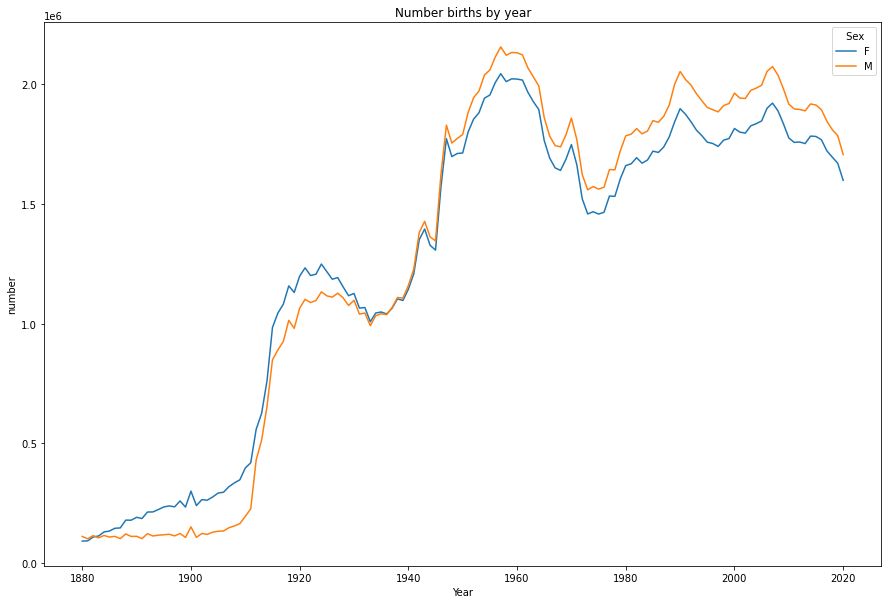

In [173]:
fig = total_births.plot(figsize=(15,10))

plt.title('Number births by year')
plt.xlabel('Year')
plt.ylabel('number')
# Affiche la légende
plt.legend(title=" Sex");

In [174]:
def add_prop_birth(group):
    births = group['births'].astype(float)
    group['prop_birth'] = births / births.sum()
    
    return group

# On ajoute par groupement les proportions ceci donnera un DataFrame
names = names.groupby(['sex', 'year']).apply(add_prop_birth)

names

,name,sex,births,year,prop_birth
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2020858,Zykell,M,5,2020,0.000003
2020859,Zylus,M,5,2020,0.000003
2020860,Zymari,M,5,2020,0.000003
2020861,Zyn,M,5,2020,0.000003


In [172]:
round( names [ ( (names['year'] == '1880') & (names['sex'] == 'F' )) ]['prop_birth'].sum())

1